In [50]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

from keras.datasets import mnist

In [2]:
# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# First the datasets are combined into one dataset. This makes it easier to normalize and look 
# at the label distribution.
variables = np.concatenate((X_train, X_test), axis=0)
labels = np.concatenate((y_train, y_test), axis=0)

# Finding the minimum and maximum pixal values
max_value = variables.max()
min_value = variables.min()

# Normalizing pixel values. This improves the networks ability to generalize and converge 
variables_norm = (variables - min_value) / (max_value - min_value)

# Split the data into training (60%), validation (20%), and test (20%) sets
X_train, variables_temp, y_train, labels_temp = train_test_split(variables_norm, labels, 
                                                                 test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(variables_temp, labels_temp, 
                                                test_size=0.5, random_state=42)

print(X_train.shape, X_test.shape, X_val.shape, y_train.shape, y_val.shape, y_test.shape)

(56000, 28, 28) (7000, 28, 28) (7000, 28, 28) (56000,) (7000,) (7000,)


# Shallow learning

Having the ability to use deep learning and develop neural networks is nice. However, deep learning should not be the first tool out of the toolbox; it is not a multi-tool that fixes everything like a magic wand. Deep learning is a powerful tool, but it must be applied to the right data. 

For simpler or smaller datasets, in particular, shallow learning (aka. traditional machine learning) should be the go-to. It is particularly powerful when handling tabular data. Shallow learning is straightforward to implement, requires less computational power (especially in comparison to deep learning), and provides clear, interpretable results, making it an excellent starting point for establishing baselines. However, when faced with more complex or larger datasets, the power of deep learning may shine, offering improved performance despite its greater computational demands.

# Logistic regression

In [3]:
# First the dataset should be flattened; instead of images of size 28 x 28, the are changed to 784x1
X_train = X_train.reshape((X_train.shape[0], -1))
X_val = X_val.reshape((X_val.shape[0], -1))
X_test = X_test.reshape((X_test.shape[0], -1))

# Standardizing the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [6]:
# Fit the model
model_lr = LogisticRegression(solver='sag', tol=0.1, C=0.1, random_state=42) 
# the sag solver is made for large datasets, 
# the tol is a sort of early stopping

model_lr.fit(X_train, y_train) # fit model on training data

# Use validation data for prediction
y_val_pred = model_lr.predict(X_val) # predict validation data

# Validation accuracy
val_accuracy = accuracy_score(y_val, y_val_pred) # get accuracy
print(f"Validation accuracy: {val_accuracy*100:.2f}%")

# Use testing data for prediction
y_pred = model_lr.predict(X_test)

# Testing accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test accuracy: {test_accuracy*100:.2f}%")

Validation accuracy: 89.16%
Test accuracy: 89.83%


## Logistic regression results

While an accuracy score hovering around 90% may not seem impressive, it gains importance when you consider that the model reached this in less than 6 seconds — covering the process of fitting, training, predicting on two datasets, and model evaluation. There has been no hyperparameter tuning, which improves the performance of the model.

Let's look at the confusion matrix for the results.

Text(0.5, 1.0, 'Accuracy Score: 89.83')

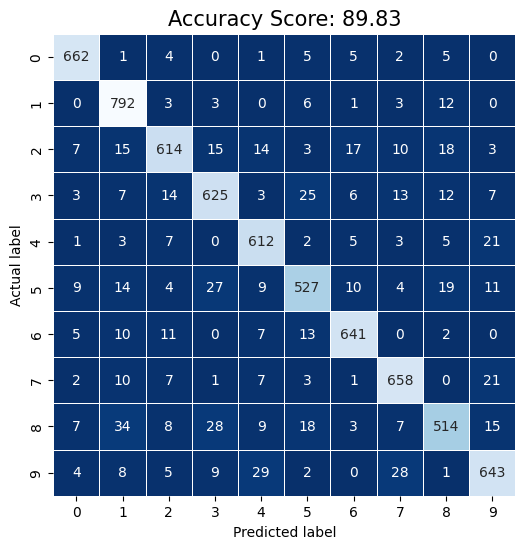

In [75]:
score = model_lr.score(X_test, y_test)
cm = confusion_matrix(y_test, y_pred)
accuracy_score = round(score*100, 2)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square=True, cmap='Blues_r', cbar=False)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0:.2f}'.format(accuracy_score)
plt.title(all_sample_title, size=15)

## Confusion matrix interpretation

The misclassifications seem to be scattered across the confusion matrix is a sort of random way. Most of the misclassifications make sense, for instance how the numbers 5 and 3 are confused with each other, as are 9 and 4. 

In a few instanes, the model classifies the number 8 with the number 1. This seems odd since a correctly written 8 should not have any straight lines, and a correctly written 1 should have no curves. <br> Let's look at some of the instances where the model misclassifies an 8 for a 1.

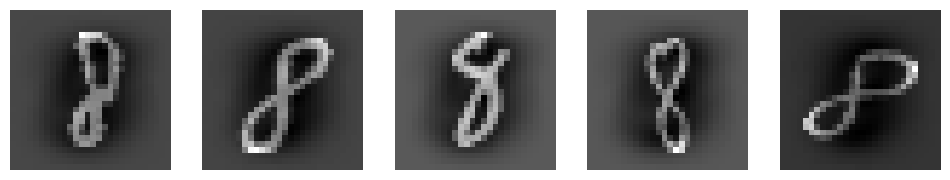

In [65]:
# Subset for the actual images of an 8, and the predicted images of a 1
misclassed = (y_test == 8) & (y_pred == 1)

# Get the images
misclassed_img = X_test[misclassed]

# Plot
num_img = 5
fig, axes = plt.subplots(1, num_img, figsize=(12, 4))

for i in range(num_img):
    axes[i].imshow(np.reshape(misclassed_img[i], (28, 28)), cmap='gray')
    axes[i].axis('off')
plt.show()

## Misclassifications

It does seem weird that these 8s are misclassified as 1s. Luckily it only happens in approximately 5% of cases where the number is an 8.

## SVM

Another technique in the shallow learning toolbox is the Support Vector Machine (SVM). It is computationally heavier than logistic regression, but will oftentimes deliver better performance.

In [48]:
# Training the SVM classifier
model_svm_lin = svm.SVC(kernel='linear', random_state=42)
model_svm_lin.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [49]:
# Training the SVM classifier
model_svm_rbf = svm.SVC(kernel='rbf', random_state=42)
model_svm_rbf.fit(X_train, y_train)

SVC(random_state=42)

In [76]:
# Evaluating SVM with linear kernel
val_score = model_svm_lin.score(X_val, y_val)
print(f'Validation Score, linear kernel: {val_score*100:.2f}%')
test_score = model_svm_lin.score(X_test, y_test)
print(f'Test Score, linear kernel: {test_score*100:.2f}%')

# Evaluating SVM with RBF kernel
val_score = model_svm_rbf.score(X_val, y_val)
print(f'Validation Score, RBF kernel: {val_score*100:.2f}%')
test_score = model_svm_rbf.score(X_test, y_test)
print(f'Test Score, RBF kernel: {test_score*100:.2f}%')

Validation Score, linear kernel: 92.03%
Test Score, linear kernel: 92.19%
Validation Score, RBF kernel: 96.01%
Test Score, RBF kernel: 96.59%


## SVM confusion matrix

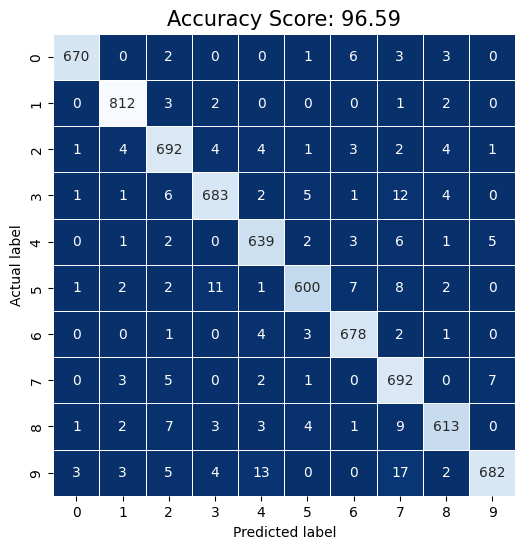

In [78]:
y_pred = model_svm_rbf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
accuracy_score = round(test_score*100, 2)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square=True, cmap='Blues_r', cbar=False)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0:.2f}'.format(accuracy_score)
plt.title(all_sample_title, size=15)
plt.show()

# SVM results

Staying with shallow learning, but moving to SVM had a positive effect on the performance. The addition of hyperparameter tuning further elevated the model, achieving an impressive accuracy of roughly 96% - a substantial enhancement over the logistic regression model.

However, the increase in accuracy comes with the cost of being computationally more expensive - by quite a factor. Where the logistic regression model takes less than 7 seconds, the SVM with a linear kernel took 3 minutes and 33 seconds, and with the RBF kernel it took 4 minutes and 18 seconds. Evaluating the two models added almost 90 seconds.

Because of the significant improvement in performance, the confusion matrix of the SVM model with RBF kernel is cleaner then with the logistic regression model. The misclassifications are still scattered, and numbers with double digit misclassifications are not surprising.

The difference is very significant, but chosing which method to go with would depend on the dataset and the goal. 